# imports and params

In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()


PATH = Path('/home/Deep_Learner/work/network/hypophysenadenome/')
GONADOTROPE_CSV_NAME = 'GonadotropeHA_gelabled.csv'
GONADOTROPE_CSV = PATH/GONADOTROPE_CSV_NAME
CORTICOTROPE_CSV_NAME = 'KortikotropHA_gelabled.csv'
CORTICOTROPE_CSV = PATH/CORTICOTROPE_CSV_NAME

label_names = {
    0:  "corticotrop",  
    1:  "gering_granuliert",   
    2:  "dicht_granuliert",   
    3:  "silent",   
    4:  "atypisch",
    5:  "Karzinom",   
    6:  "keinCortikotropesAdenom",   
    7:  "gonadotrop",   
    8:  "LH",   
    9:  "FSH",   
    10: "TSH",
    11: "Prolaktin"
}

reverse_label_names = dict((v,k) for k,v in label_names.items())

# Labels distrib.

In [11]:
def fill_targets(row):
    row.label = np.array(row.label.split(" ")).astype(np.int)
    for num in row.label:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

def get_labels_distribution(df:pd.DataFrame):
    df_copy = df.copy()
    for key in label_names.keys():
        df_copy[label_names[key]] = 0
    df_copy = df_copy.apply(fill_targets, axis=1)
    target_counts = df_copy.drop(["id", "label"],axis=1).sum(axis=0).sort_values(ascending=False)
    plt.figure(figsize=(15,15))
    sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)
    return target_counts

## Corticotrope

In [12]:
train_labels = pd.read_csv(CORTICOTROPE_CSV)
train_labels.head()

,id,label,Rezidiv/Restanteile,corticotrop=0 geringGr=1 dichtGr=2 silent=3 atypisch=4 Karzinom=5 keinCortikotropesAdenom=6
0,1047/12,0 1,0,NaN
1,1061/12,0 2,0,NaN
2,1182/12,0 1,0,NaN
3,1281/12,0 1,0,NaN
4,1298/12,0 1,1,NaN


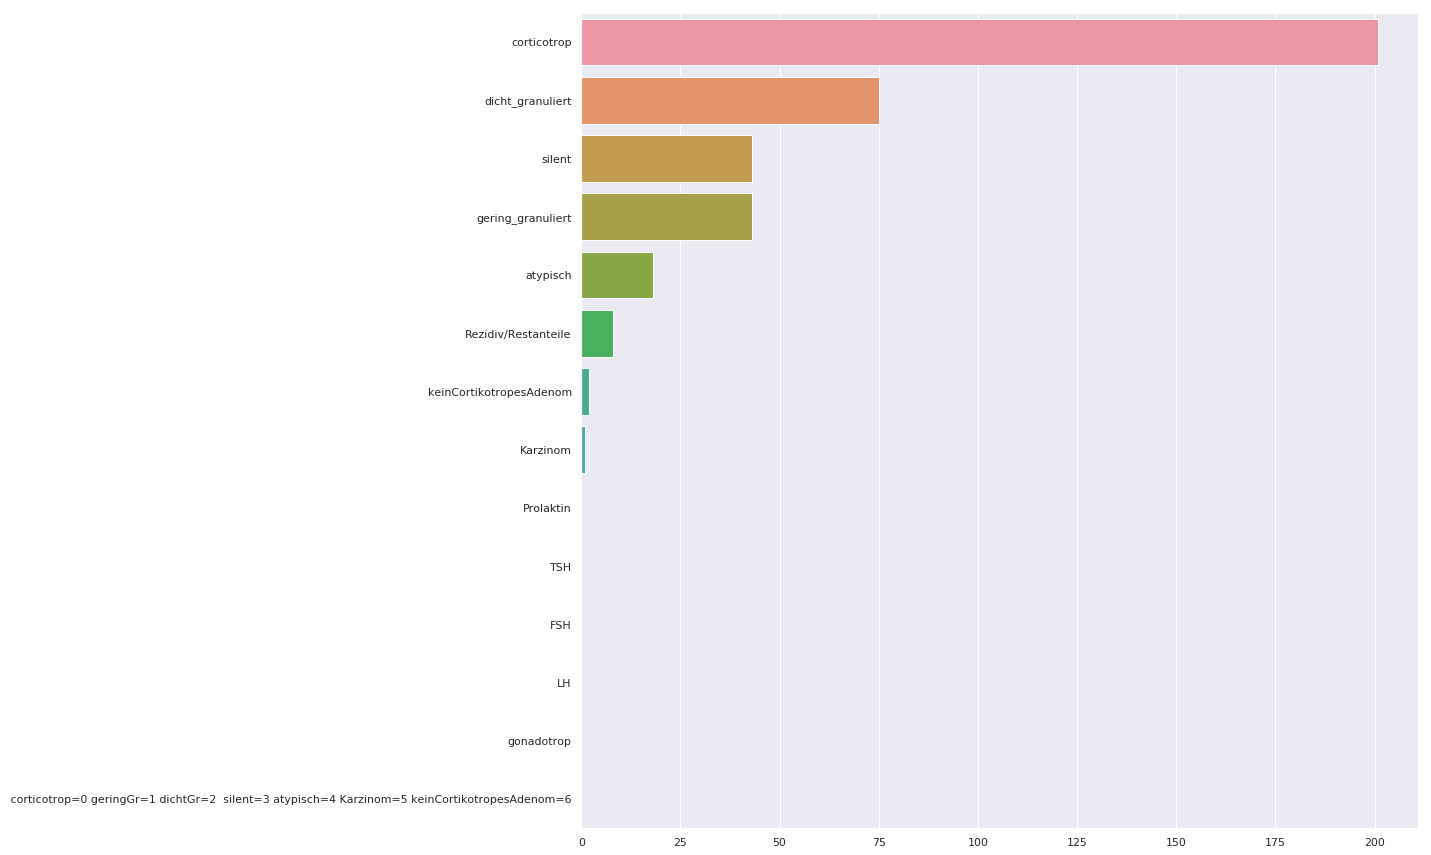

In [13]:
target_counts = get_labels_distribution(train_labels)

In [14]:
target_counts

corticotrop                                                                                      201.0
dicht_granuliert                                                                                  75.0
silent                                                                                            43.0
gering_granuliert                                                                                 43.0
atypisch                                                                                          18.0
Rezidiv/Restanteile                                                                                8.0
keinCortikotropesAdenom                                                                            2.0
Karzinom                                                                                           1.0
Prolaktin                                                                                          0.0
TSH                                                                      

## Gonadotrop

In [15]:
train_labels = pd.read_csv(GONADOTROPE_CSV)
train_labels.head()

,id,label,Rezidiv/Rest,atypisch=4 gonadotrop=7 LH=8 FSH=9 TSH=10 Prolaktin=11
0,105/03,7 9,0,NaN
1,116/03,7 9,0,NaN
2,191/03,7 9,0,NaN
3,208/03,7 8,0,NaN
4,219/03,7 9,0,NaN


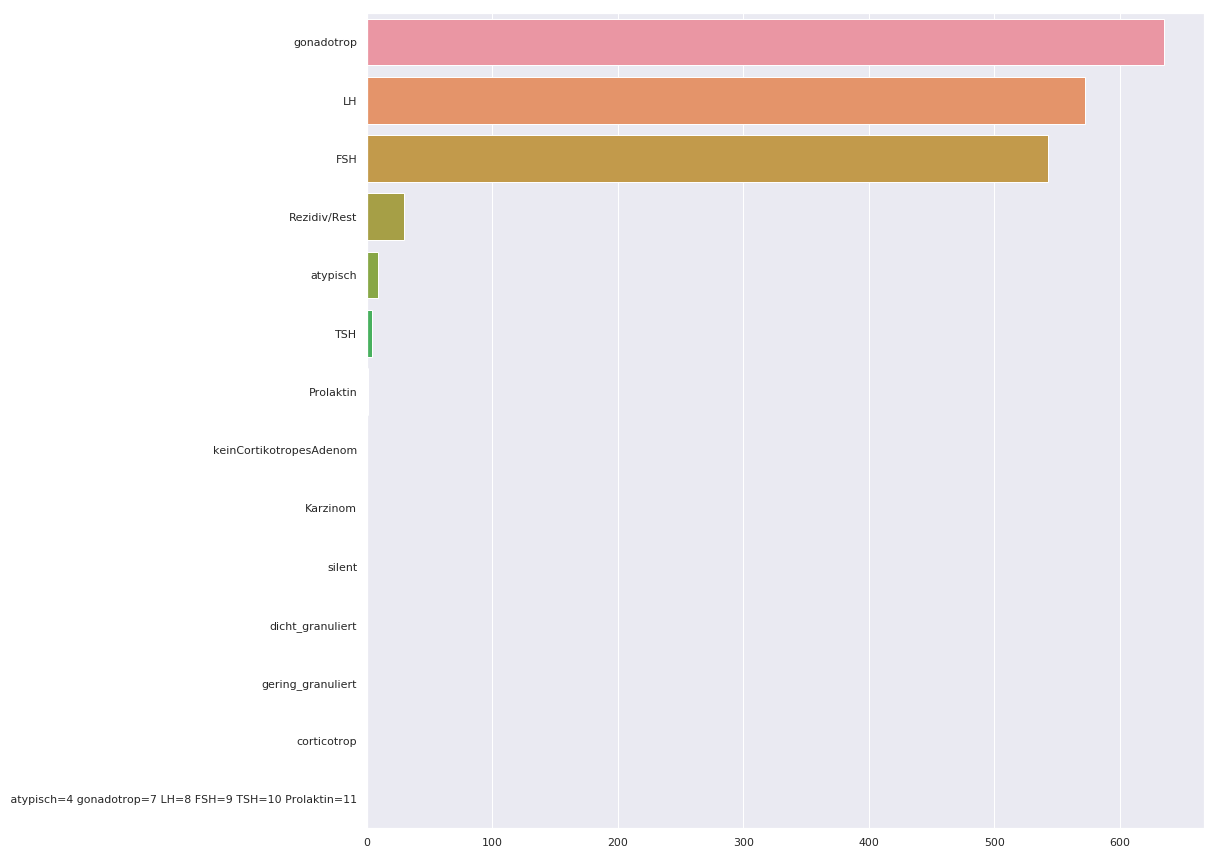

In [16]:
target_counts = get_labels_distribution(train_labels)

In [17]:
target_counts

gonadotrop                                                 635.0
LH                                                         572.0
FSH                                                        543.0
Rezidiv/Rest                                                30.0
atypisch                                                     9.0
TSH                                                          4.0
Prolaktin                                                    1.0
keinCortikotropesAdenom                                      0.0
Karzinom                                                     0.0
silent                                                       0.0
dicht_granuliert                                             0.0
gering_granuliert                                            0.0
corticotrop                                                  0.0
 atypisch=4 gonadotrop=7 LH=8 FSH=9 TSH=10 Prolaktin=11      0.0
dtype: float64